# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
# https://www.tensorflow.org/install/source_windows

In [5]:
if os.name=='nt':
    !pip install wget
    import wget

You should consider upgrading via the 'c:\users\ursja\onedrive\desktop\npd\npdsys\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

Cloning into 'Tensorflow\models'...
Updating files:  16% (494/2962)
Updating files:  17% (504/2962)
Updating files:  18% (534/2962)
Updating files:  19% (563/2962)
Updating files:  19% (582/2962)
Updating files:  20% (593/2962)
Updating files:  21% (623/2962)
Updating files:  22% (652/2962)
Updating files:  23% (682/2962)
Updating files:  24% (711/2962)
Updating files:  25% (741/2962)
Updating files:  26% (771/2962)
Updating files:  27% (800/2962)
Updating files:  27% (828/2962)
Updating files:  28% (830/2962)
Updating files:  29% (859/2962)
Updating files:  30% (889/2962)
Updating files:  31% (919/2962)
Updating files:  32% (948/2962)
Updating files:  33% (978/2962)
Updating files:  34% (1008/2962)
Updating files:  35% (1037/2962)
Updating files:  36% (1067/2962)
Updating files:  37% (1096/2962)
Updating files:  38% (1126/2962)
Updating files:  39% (1156/2962)
Updating files:  39% (1165/2962)
Updating files:  40% (1185/2962)
Updating files:  41% (1215/2962)
Updating files:  42% (1245/

In [8]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
Traceback (most recent call last):
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 154, in save_modules
    yield saved
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 195, in setup_context
    yield
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 250, in run_setup
    _execfile(setup_script, ns)
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 45, in _execfile
    exec(code, globals, locals)
  File "C:\Users\ursja\AppData\Local\Temp\easy_install-gzcvjtfk\pycocotoo


running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_ssd_gr

    raise
  File "C:\Users\ursja\AppData\Local\Programs\Python\Python39\lib\contextlib.py", line 135, in __exit__
    self.gen.throw(type, value, traceback)
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 195, in setup_context
    yield
  File "C:\Users\ursja\AppData\Local\Programs\Python\Python39\lib\contextlib.py", line 135, in __exit__
    self.gen.throw(type, value, traceback)
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 166, in save_modules
    saved_exc.resume()
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 141, in resume
    six.reraise(type, exc, self._tb)
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\_vendor\six.py", line 685, in reraise
    raise value.with_traceback(tb)
  File "C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\lib\site-packages\setuptools\sandbox.py", line 154, in save_modules
  


byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v3_feature_extractor_testbase.py to ssd_mobilenet_v3_feature_extractor_testbase.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_mobilenet_v3_feature_extractor_tf1_test.py to ssd_mobilenet_v3_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_pnasnet_feature_extractor.py to ssd_pnasnet_feature_extractor.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_pnasnet_feature_extractor_tf1_test.py to ssd_pnasnet_feature_extractor_tf1_test.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_fpn_feature_extractor.py to ssd_resnet_v1_fpn_feature_extractor.cpython-39.pyc
byte-compiling build\bdist.win-amd64\egg\object_detection\models\ssd_resnet_v1_fpn_feature_extractor_testbase.py to ssd_resnet_v1_fpn_feature_extractor_testbase.cpython-39.pyc
byte-co

Obtaining file:///C:/Users/ursja/OneDrive/Desktop/NPD/Tensorflow/models/research/slim
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Running setup.py develop for slim


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.8.0 requires Cython, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-mod

In [8]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-03-19 16:04:18.514298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-03-19 16:04:18.538140: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-19 16:05:43.058157: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-03-19 16:05:43.066419: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-19 16:05:43.092760: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-TKOECRF
2022-03-19 16:05:43.093527: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-TKOECRF
Running tests under Python 3.9.1: C:\Users\ursja\OneDrive\Desktop\NPD\npdsys\Scripts\python.exe
[ RUN     

In [11]:
!pip install tensorflow --upgrade

     ------------------------------------ 438.0/438.0 MB 390.3 kB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 14.7/14.7 MB 660.6 kB/s eta 0:00:00
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
     ------------------------------------ 895.7/895.7 KB 320.3 kB/s eta 0:00:00
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
     ---------------------------------------- 2.8/2.8 MB 803.1 kB/s eta 0:00:00
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 1.5/1.5 MB 738.8 kB/s eta 0:00:00
     

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth-2.6.0-py2.py3-none-any.whl (156 kB)
  Using cached Markdown-3.3.6-py3-none-any.whl (97 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
     -------------------------------------- 289.2/289.2 KB 2.2 MB/s eta 0:00:00
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
     -------------------------------------- 63.1/63.1 KB 260.6 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached cachetools-5.0.0-py3-none-any.whl (9.1 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached importlib_metadata-4.11.1-py3-none-any.whl (17 kB)
     -------------------------------------- 138.7/138.7 KB 1.4 MB/s eta 0:00:00

tf-models-official 2.8.0 requires Cython, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires matplotlib, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires Pillow, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires pycocotools, which is not installed.
tf-models-official 2.8.0 requires pyyaml<6.0,>=5.1, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepi

In [17]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.5.1

Found existing installation: protobuf 3.19.4
Uninstalling protobuf-3.19.4:
  Successfully uninstalled protobuf-3.19.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lxml, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
tf-models-official 2.8.0 requires Cython, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, whic


  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
     ---------------------------------------- 7.2/7.2 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 895.5/895.5 KB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 3.0 MB/s eta 0:00:00


In [19]:
!pip install pyyaml

     ------------------------------------ 151.6/151.6 KB 906.4 kB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.8.0 requires Cython, which is not installed.
tf-models-official 2.8.0 requires gin-config, which is not installed.
tf-models-official 2.8.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.8.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.8.0 requires oauth2client, which is not installed.
tf-models-official 2.8.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.8.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.8.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.8.0 requires pycocotools, which is not installed.
tf-models-official 2.8.0 requires sacrebleu, which is not installed.
tf-models-official 2.8.0 requires sentencepiece, which is not installed.
tf-model

In [6]:
import object_detection

In [10]:
!pip list

Package              Version Editable project location
-------------------- ------- -------------------------------------------------------------------
absl-py              1.0.0
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
black                22.1.0
bleach               4.1.0
cffi                 1.15.0
click                8.0.4
colorama             0.4.4
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.2
ipykernel            6.9.1
ipython              8.0.1
ipython-genutils     0.2.0
jedi                 0.18.1
Jinja2               3.0.3
jsonschema           4.4.0
jupyter-client       7.1.2
jupyter-core         4.9.2
jupyterlab-pygments  0.1.2
keras                2.8.0
lvis                 0.5.3
MarkupSafe           2.1.0
matplotlib-inline    0.1.3
mistune              0.8.4
mypy-extensions      0.4.3
nbclien

In [8]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [6]:
labels = [{'name':'licence', 'id':1}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [ ]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [10]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

Cloning into 'Tensorflow\scripts'...


In [12]:
!pip install pytz

     ------------------------------------ 503.5/503.5 KB 493.2 kB/s eta 0:00:00


In [10]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [11]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# 5. Update Config For Transfer Learning

In [7]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [8]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [9]:
config

{'model': ssd {
   num_classes: 1
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [10]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [11]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [12]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [16]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=18000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [11]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=12000


In [ ]:
!{command}

In [49]:
import sys
sys.version_info.major

3

In [51]:
#Validation
!pip install tfx==0.21.0 tensorflow==2.5 tensorboard==2.1

ERROR: Could not find a version that satisfies the requirement tfx-bsl<0.22,>=0.21 (from tfx) (from versions: none)
ERROR: No matching distribution found for tfx-bsl<0.22,>=0.21



  Using cached tfx-0.21.0-py3-none-any.whl (1.0 MB)
     ---------------------------------------- 422.6/422.6 MB ? eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 2.5 MB/s eta 0:00:00
     -------------------------------------- 270.6/270.6 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


In [53]:
import tensorflow_data_validation
stats = tfdv.generate_statistics_from_tfrecord(data_location=TRAINING_SCRIPT)

ModuleNotFoundError: No module named 'tensorflow_data_validation'

# 7. Evaluate the Model

In [17]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [18]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet


In [22]:
!{command}

^C


# 8. Load Train Model From Checkpoint

In [13]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [4]:
gpus=tf.config.list_physical_devices('GPU')
gpus

[]

In [14]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-13')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [15]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [17]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'Cars419.png')

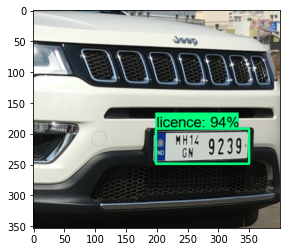

In [18]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
detections['detection_scores']

array([0.93747926, 0.07735556, 0.06832066, 0.05533403, 0.04482636,
       0.03824365, 0.03622454, 0.03527305, 0.03182188, 0.03116927,
       0.03052974, 0.03022659, 0.02741081, 0.02546483, 0.02356917,
       0.02312931, 0.02270326, 0.02260697, 0.0225313 , 0.02239683,
       0.02219638, 0.02167633, 0.02119103, 0.02102745, 0.02013603,
       0.0199241 , 0.01977929, 0.01955768, 0.01935986, 0.01865533,
       0.01796317, 0.01782   , 0.01744431, 0.01715595, 0.01703459,
       0.01694673, 0.01672328, 0.01630101, 0.01617122, 0.01614392,
       0.01585275, 0.01531804, 0.01530477, 0.01529974, 0.01508653,
       0.01494831, 0.01482865, 0.01418903, 0.01388702, 0.01378605,
       0.01353285, 0.01245221, 0.01239437, 0.01218131, 0.01201296,
       0.01175964, 0.01169753, 0.0116269 , 0.01150772, 0.01138675,
       0.01115796, 0.01110846, 0.01092273, 0.01082054, 0.01081112,
       0.01069155, 0.01031399, 0.01027486, 0.01022404, 0.01016009,
       0.01010773, 0.00987273, 0.00981626, 0.00981224, 0.00973

In [19]:
detection_threshold=0.9

In [20]:
image=image_np_with_detections
scores=list(filter(lambda x:x> detection_threshold,detections['detection_scores']))
boxes=detections['detection_boxes'][:len(scores)]
classes=detections['detection_classes'][:len(scores)]
scores

[0.93747926]

In [21]:
width=image.shape[1]
height=image.shape[0]

In [22]:
detections.keys()

dict_keys(['detection_boxes', 'detection_scores', 'detection_classes', 'raw_detection_boxes', 'raw_detection_scores', 'detection_multiclass_scores', 'detection_anchor_indices', 'num_detections'])

In [23]:
import cv2

[0.54505026 0.49557447 0.70455647 0.87510586]
[192.40274298 198.22978973 248.7084322  350.04234314]


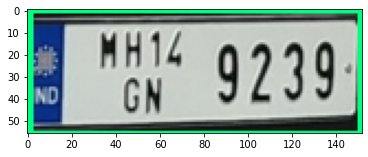

In [24]:
#apply roi filtering and OCR
for idx,box in enumerate(boxes):
    print(box)
    roi=box*[height, width, height, width]
    print(roi)
    region=image[int(roi[0]):int(roi[2]),int(roi[1]):int(roi[3])]
    plt.imshow(cv2.cvtColor(region,cv2.COLOR_BGR2RGB))

In [28]:
!pip install easyocr

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\ursja\\onedrive\\desktop\\npd\\npdsys\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.




  Using cached easyocr-1.4.1-py3-none-any.whl (63.6 MB)
  Using cached scikit_image-0.19.2-cp39-cp39-win_amd64.whl (12.6 MB)
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-win_amd64.whl (35.3 MB)
  Using cached networkx-2.7.1-py3-none-any.whl (2.0 MB)
  Using cached imageio-2.16.1-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.16.0-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.15.0-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.14.1-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.14.0-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.5-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.4-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.3-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.2-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.1-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.13.0-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.12.0-py3-none-any.whl (3.3 MB)
  Using cached imageio-2.11.1-py3-none-any.whl (3.3 MB)
  Using c

In [27]:
!pip3 install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio===0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html


In [26]:
!pip3 install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 1.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.3
    Uninstalling pip-22.0.3:
      Successfully uninstalled pip-22.0.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ursja\\AppData\\Local\\Temp\\pip-uninstall-4h28r_ip\\pip3.exe'
Check the permissions.



In [41]:
import easyocr

ModuleNotFoundError: No module named 'easyocr'

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [14]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

array([0.02901557, 0.021568  , 0.01809487, 0.01651889, 0.0164327 ,
       0.01561517, 0.01351535, 0.01282007, 0.01218975, 0.01213059,
       0.01205921, 0.01201463, 0.01169592, 0.01134181, 0.01113641,
       0.0105719 , 0.01051715, 0.01043668, 0.0102936 , 0.01003098,
       0.00994608, 0.00982839, 0.00966111, 0.00953969, 0.00947857,
       0.0094648 , 0.00940546, 0.00927609, 0.0091154 , 0.00884974,
       0.00851843, 0.00794572, 0.00791869, 0.00790739, 0.0075368 ,
       0.00750288, 0.00749651, 0.0074788 , 0.00736937, 0.0072695 ,
       0.00717419, 0.00712788, 0.0070954 , 0.00705311, 0.00682831,
       0.00679803, 0.00679588, 0.00678411, 0.0066531 , 0.00663197,
       0.0065279 , 0.00650463, 0.00648576, 0.00645483, 0.0062407 ,
       0.00623661, 0.00621393, 0.00615558, 0.00613254, 0.00611934,
       0.00609341, 0.00608438, 0.00604099, 0.00601089, 0.00599182,
       0.00595602, 0.00591233, 0.00590095, 0.00587398, 0.00587189,
       0.00586858, 0.00583658, 0.00578615, 0.00578588, 0.00578

[]

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')